In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("dltutsCHURN_csvsheet.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
760,4013-GUXND,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.8,20.8,No
5146,3797-FKOGQ,Male,0,No,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,86.2,893.2,No
5012,9367-TCUYN,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.1,223.6,No
2976,4830-FAXFM,Male,0,No,Yes,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),24.1,439.2,No
3053,0960-HUWBM,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.1,6700.05,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges , errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#coerce will ignore the errors wherever it has spaces it will put na

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
#passing the above result to our dataframe will show that the totalcharges column is empty so we can drop it
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape#original

(7043, 20)

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
#this is after we drop all correct or True totalcharges row

(11, 20)

In [11]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

In [16]:
#finding loyal customer with large tenure using histogram

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

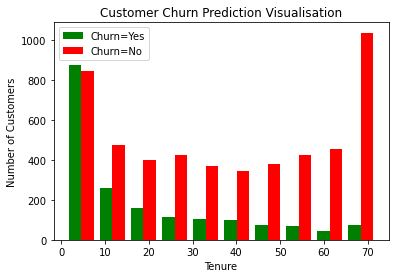

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

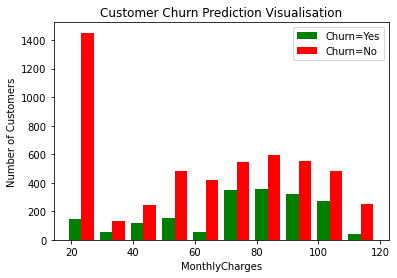

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
#replacing no internet service , no phone sevice with no

In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [25]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
#replacing yes, no with 1 and 0

In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [29]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [31]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [32]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5233,1,0,1,0,8,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
6752,1,0,0,0,12,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1
6560,0,0,0,1,23,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4828,1,0,0,0,39,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0


In [33]:
df1.shape

(7032, 20)

In [34]:
df2.shape

(7032, 27)

In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [36]:
#scaling the data

In [37]:
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [38]:
for cols in df2:
    print(f'{col}:{df2[cols_to_scale]}')

Churn:      MonthlyCharges  TotalCharges    tenure
0           0.115423      0.001275  0.000000
1           0.385075      0.215867  0.464789
2           0.354229      0.010310  0.014085
3           0.239303      0.210241  0.619718
4           0.521891      0.015330  0.014085
...              ...           ...       ...
7038        0.662189      0.227521  0.323944
7039        0.845274      0.847461  1.000000
7040        0.112935      0.037809  0.140845
7041        0.558706      0.033210  0.042254
7042        0.869652      0.787641  0.915493

[7032 rows x 3 columns]
Churn:      MonthlyCharges  TotalCharges    tenure
0           0.115423      0.001275  0.000000
1           0.385075      0.215867  0.464789
2           0.354229      0.010310  0.014085
3           0.239303      0.210241  0.619718
4           0.521891      0.015330  0.014085
...              ...           ...       ...
7038        0.662189      0.227521  0.323944
7039        0.845274      0.847461  1.000000
7040        0.1129

In [39]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [41]:
X_train.shape

(5625, 26)

In [42]:
X_test.shape

(1407, 26)

In [43]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [44]:
len(X_train.columns)

26

In [45]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6654 - accuracy: 0.6405
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7877
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7991
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8188
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8185
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8158
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8155
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8180
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8169
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8204
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8167
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8172
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 

In [46]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7946


[0.44357913732528687, 0.7945984601974487]

In [47]:
yp=model.predict(X_test)#yp is y_predicted
yp[:5]

array([[0.18400759],
       [0.4732276 ],
       [0.01158965],
       [0.81537986],
       [0.42060694]], dtype=float32)

In [48]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [49]:
#yp is a 2d array so we will convert it to 1d array becoz y_test is 1d

In [50]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [52]:
#classification report

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       999
           1       0.68      0.54      0.61       408

    accuracy                           0.79      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

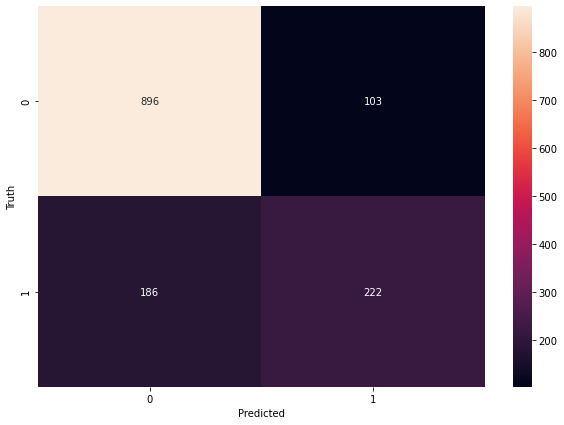

In [54]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')